In [ ]:
# Imports required libraries and data.

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/Marley-Myrianthopoulos/grad_school_data/main/links.tsv"
df = pd.read_csv(url, sep='\t', skiprows = 12, header = None)
print(df.head())

In [ ]:
# Filters data frame so that each link connects two century pages

#df_2 = df[df.iloc[:, 0].str.contains(r'century')]
#df_3 = df_2[df_2.iloc[:, 1].str.contains(r'century')]
df_3 = df[(df[0].str.contains(r'century')) & (df[1].str.contains(r'century'))]
print(df_3.head())

                0             1
115  10th_century  11th_century
116  10th_century   9th_century
141  11th_century  10th_century
142  11th_century  12th_century
143  11th_century  13th_century


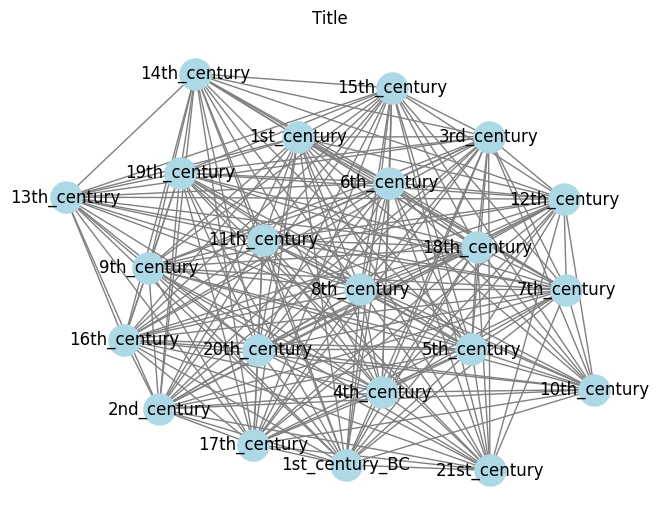

In [ ]:
G=nx.from_pandas_edgelist(df_3, 0, 1)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.title('Title')
plt.show()

In [ ]:
# The diameter of the graph is 2, which means the greatests minimum distance between two nodes is 2

nx.diameter(G,e=None)

2

In [ ]:
nx.periphery(G)

['10th_century', '13th_century', '14th_century', '21st_century']

In [ ]:
source_node = ["10th_century", "10th_century", "10th_century", "13th_century", "13th_century", "14th_century"]
target_node = ["13th_century", "14th_century", "21st_century", "14th_century", "21st_century", "21st_century"]
path_length = []

for i in range(len(source_node)):
  path_length.append(len(nx.shortest_path(G, source = source_node[i], target = target_node[i])))

df_long_paths = pd.DataFrame({'Source': source_node,
                              'Target': target_node,
                              'Path': path_length})

print(df_long_paths)

         Source        Target  Path
0  10th_century  13th_century     3
1  10th_century  14th_century     3
2  10th_century  21st_century     3
3  13th_century  14th_century     2
4  13th_century  21st_century     3
5  14th_century  21st_century     3


In [ ]:
nx.density(G)

0.9783549783549783

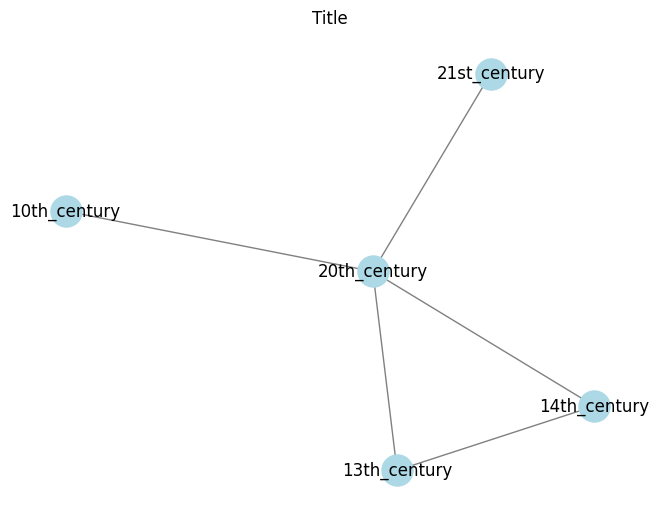

In [ ]:
second_graph = nx.periphery(G)
second_graph.append('20th_century')

df_4 = df_3[(df_3[0].isin(second_graph)) & (df_3[1].isin(second_graph))]

G2 = nx.from_pandas_edgelist(df_4, 0, 1)
pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.title('Title')
plt.show()